In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

sep = "\t"

In [6]:
df = pd.read_csv('Dataset.txt', sep=",", names=["Feature 1", "Feature 2", "Class"], header=None)

In [7]:
df.head()

,Feature 1,Feature 2,Class
0,-0.81,0.24,1
1,0.63,0.83,1
2,-0.70,0.60,1
3,0.50,0.63,1
4,-0.24,0.34,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  999 non-null    float64
 1   Feature 2  999 non-null    float64
 2   Class      999 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 23.5 KB


In [5]:
X1=df.iloc[:,0 ]
X2=df.iloc[:, 1]
X=np.column_stack((X1,X2))
y = df.iloc[:, 2]

In [6]:
print(X)
print(y)

[[-0.81  0.24]
 [ 0.63  0.83]
 [-0.7   0.6 ]
 ...
 [ 0.35 -0.41]
 [ 0.87  0.73]
 [-0.15 -0.52]]
0      1
1      1
2      1
3      1
4      1
      ..
994    1
995   -1
996   -1
997    1
998   -1
Name: Class, Length: 999, dtype: int64


# Point (a)

## (i) - Visualize the data

<function matplotlib.pyplot.show(close=None, block=None)>

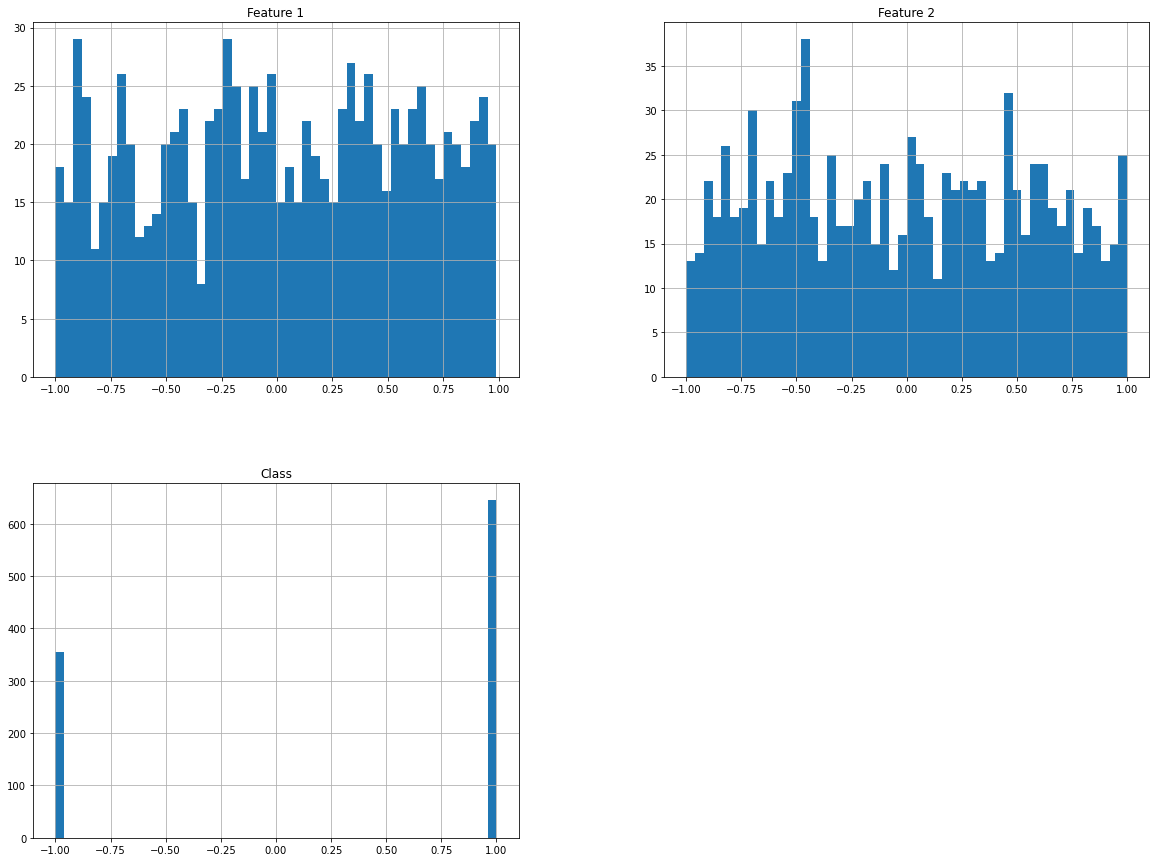

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.show

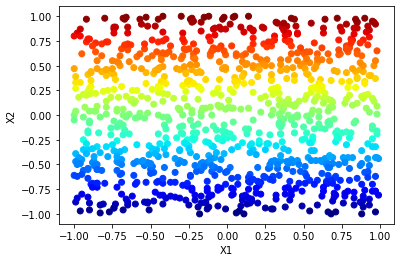

In [8]:
plt.ylabel('X2')
plt.xlabel('X1')
sizevalues = 0 
plotcolor = ['red','orange']
plt.scatter(X1, X2, cmap = plt.get_cmap("jet"), c=X2)
plt.show()



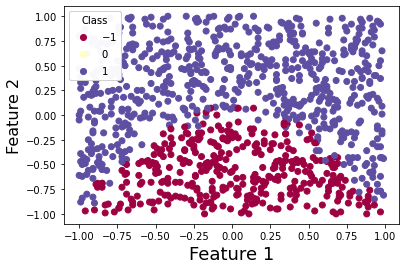

In [9]:

fig, ax = plt.subplots()

scatter = ax.scatter(df['Feature 1'], df['Feature 2'], c=df['Class'], cmap="Spectral")

legend1 = ax.legend(*scatter.legend_elements(num=2),
                    loc="upper left", title="Class")
plt.xlabel('Feature 1', fontsize=18)
plt.ylabel('Feature 2', fontsize=16)
ax.add_artist(legend1)


plt.show()

## (ii) -Logistic regression classifier

In [10]:
#generating a test set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [11]:
print(len(train_set))
print(len(test_set))

799
200


In [12]:
#prepare the model for machine learning algorithm
feature_values = train_set.drop("Class", axis=1)
labels = train_set["Class"].copy()

In [13]:
print(feature_values.head())

     Feature 1  Feature 2
778       0.46      -0.46
286       0.71      -0.98
165       0.17       0.78
960      -0.21       0.57
493      -0.17      -0.49


In [14]:
print(labels.head())

778   -1
286   -1
165    1
960    1
493   -1
Name: Class, dtype: int64


In [15]:
# import and train the Logistic Regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(feature_values, labels)

LogisticRegression()

In [16]:
print(log_reg.coef_)
print(log_reg.intercept_)

[[-0.02762924  5.06313701]]
[1.65715121]


In [17]:
print(log_reg.get_params())

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [18]:
odds = np.exp(log_reg.coef_[0])
pd.DataFrame(odds, 
             feature_values.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
Feature 2,158.085655
Feature 1,0.972749


In [19]:
feature_importance = pd.DataFrame(feature_values.columns, columns=["feature"])

In [20]:
import math
feature_importance['importance'] = pow(math.e, np.array(log_reg.coef_[0]))

In [21]:
feature_importance

,feature,importance
0,Feature 1,0.972749
1,Feature 2,158.085655


## (iii) - Logistic regression performance

In [22]:
y_pred_train = log_reg.predict(feature_values)
y_pred_train

array([-1, -1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1,
        1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1,
        1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1,
        1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1,
       -1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,
       -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1, -1,  1, -1,  1

In [23]:
print("Point", "Truth", "Pred", "Match")
for i, elems in enumerate(zip(labels, y_pred_train)):
    t, p = elems
    if t != p:
        error = "MISPREDICTION"
    else:
        error = ""
    print(i, t, p, error)

Point Truth Pred Match
0 -1 -1 
1 -1 -1 
2 1 1 
3 1 1 
4 -1 -1 
5 -1 -1 
6 -1 -1 
7 1 1 
8 1 1 
9 1 1 
10 -1 -1 
11 -1 -1 
12 1 1 
13 1 -1 MISPREDICTION
14 1 1 
15 -1 -1 
16 1 1 
17 -1 -1 
18 1 1 
19 1 -1 MISPREDICTION
20 1 1 
21 1 1 
22 1 1 
23 1 1 
24 1 1 
25 1 1 
26 -1 -1 
27 1 1 
28 1 1 
29 1 1 
30 1 1 
31 1 1 
32 1 1 
33 1 1 
34 -1 -1 
35 1 1 
36 1 1 
37 -1 1 MISPREDICTION
38 1 1 
39 -1 -1 
40 -1 -1 
41 -1 -1 
42 1 1 
43 -1 -1 
44 1 1 
45 1 1 
46 1 1 
47 -1 -1 
48 1 1 
49 1 -1 MISPREDICTION
50 1 -1 MISPREDICTION
51 -1 1 MISPREDICTION
52 -1 1 MISPREDICTION
53 1 1 
54 1 1 
55 -1 -1 
56 1 1 
57 1 1 
58 -1 -1 
59 1 1 
60 1 1 
61 1 1 
62 1 1 
63 -1 -1 
64 -1 -1 
65 1 1 
66 1 1 
67 1 1 
68 1 1 
69 1 1 
70 1 1 
71 1 1 
72 -1 -1 
73 -1 1 MISPREDICTION
74 -1 -1 
75 -1 -1 
76 -1 -1 
77 -1 -1 
78 1 1 
79 1 1 
80 -1 -1 
81 -1 1 MISPREDICTION
82 -1 -1 
83 -1 1 MISPREDICTION
84 1 1 
85 1 1 
86 1 1 
87 1 1 
88 -1 -1 
89 -1 -1 
90 1 1 
91 1 1 
92 1 1 
93 1 1 
94 1 -1 MISPREDICTION
95 -1 -1 
96 1 

788 1 1 
789 -1 -1 
790 -1 -1 
791 -1 1 MISPREDICTION
792 1 1 
793 1 1 
794 -1 1 MISPREDICTION
795 1 1 
796 1 1 
797 -1 -1 
798 -1 -1 


In [24]:
feature_values_test = test_set.drop("Class", axis=1)
labels_test = test_set["Class"].copy()
labels_pred = log_reg.predict(feature_values_test)
labels_pred

array([-1, -1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,
        1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,  1, -1,
       -1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1,  1,  1, -1, -1,  1,
        1,  1,  1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1,
       -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1,
       -1,  1, -1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
        1, -1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1], dtype=int64)

In [25]:
labels_pred_train = log_reg.predict(feature_values)

In [26]:
def repack_results(train_size=1, ok_size=20, ko_size=50):
    """
    I'm converting back the arrays to a dataframe.
    Also, I am giving a large numerical value where predictions DO NOT match input data
    """
    traindata = pd.DataFrame(train_set, columns=["Feature 1", "Feature 2"])
    traindata["Class"] = train_set["Class"]
    traindata["Match"] = [train_size for _ in range(traindata.shape[0])]
    results = pd.DataFrame(test_set, columns=["Feature 1", "Feature 2"])
    results["Class"] = test_set["Class"].copy()
    results["Match"] = [ok_size if x == y else ko_size for x,y in zip(labels_test, labels_pred)]
    return pd.concat([results, traindata]).sort_values(by="Class", ascending=False)

res = repack_results()

def repack_results2(train_size=1, ok_size=10, ko_size=70):
    """
    I'm converting back the arrays to a dataframe.
    Also, I am giving a large numerical value where predictions DO NOT match input data
    """
    traindata = pd.DataFrame(train_set, columns=["Feature 1", "Feature 2"])
    traindata["Class"] = train_set["Class"]
    traindata["Match"] = [ok_size if x == y else ko_size for x,y in zip(labels, labels_pred_train)]
    return traindata.sort_values(by="Class", ascending=False)

res_train = repack_results2()

In [27]:
res_train.head()
print(res_train["Match"].value_counts())

from sklearn.metrics import accuracy_score

acc = accuracy_score(labels, labels_pred_train)
print(round(acc*100, 2), "%", sep="")

10    690
70    109
Name: Match, dtype: int64
86.36%


In [28]:
FN = len(res_train[(res_train['Match']==50) & (res_train['Class'] == -1)])
FP = len(res_train[(res_train['Match']==50) & (res_train['Class'] == 1)])

TP = len(res_train[(res_train['Match']==20) & (res_train['Class'] == -1)])
TN = len(res_train[(res_train['Match']==20) & (res_train['Class'] == 1)])

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
prec = precision_score(labels, labels_pred_train)
rec = recall_score(labels, labels_pred_train)
print(round(prec*100, 2), "%", sep="")
print(round(rec*100, 2), "%", sep="")


90.15%
88.95%


In [29]:
res.head()

,Feature 1,Feature 2,Class,Match
453,-0.90,-0.89,1,50
42,-0.71,-0.48,1,1
392,-0.82,0.60,1,1
206,-0.90,0.27,1,1
864,0.85,0.62,1,1


In [30]:
# transform the df data into a numpy array so we could use plot_decision_regions function
feature_values_np = feature_values[['Feature 1', 'Feature 2']].to_numpy()
labels_np = labels.to_numpy()

C:\Users\catat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


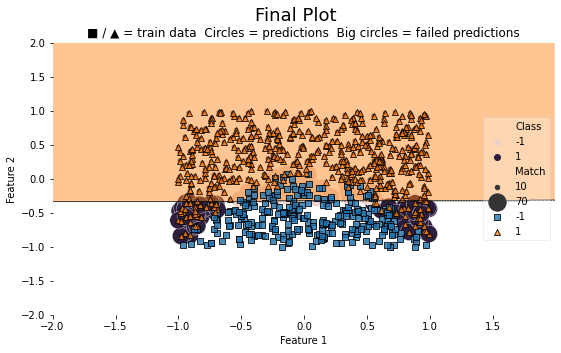

In [31]:
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

suptitle = "Final Plot"
def plot_results():
    fig = plt.figure(figsize=(9,5))
    fig.suptitle(suptitle, size=18)
    ax = sns.scatterplot(data=res_train, x="Feature 1", y="Feature 2", hue="Class", size="Match", sizes=(20,300))
    ax.set_title("■ / ▲ = train data  Circles = predictions  Big circles = failed predictions")

    plot_decision_regions(feature_values_np, labels_np, clf=log_reg, legend=5)
    
plot_results()

C:\Users\catat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


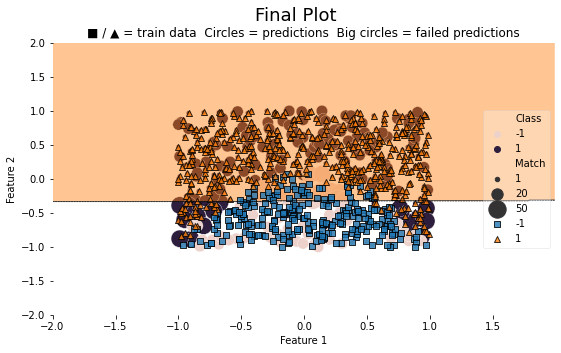

In [32]:
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

# see comments for the previous function! :)
suptitle = "Final Plot"
def plot_results():
    fig = plt.figure(figsize=(9,5))
    fig.suptitle(suptitle, size=18)
    ax = sns.scatterplot(data=res, x="Feature 1", y="Feature 2", hue="Class", size="Match", sizes=(20,300))
    ax.set_title("■ / ▲ = train data  Circles = predictions  Big circles = failed predictions")

    plot_decision_regions(feature_values_np, labels_np, clf=log_reg, legend=5)
    
plot_results()

In [33]:
# getting the accuracy score 
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, labels_pred)
print(round(acc*100, 2), "%", sep="")

prec = precision_score(labels_test, labels_pred)
rec = recall_score(labels_test, labels_pred)
print(round(prec*100, 2), "%", sep="")
print(round(rec*100, 2), "%", sep="")

79.0%
81.45%
84.17%


# (b) Second problem - SVM 

## (i) Train linear SVM classifiers for a wide range of values of the penalty parameter C

In [47]:
'''
Train linear SVM classifiers for a wide range of values of the penalty parameter
C e.g. C = 0.001, C = 1, C = 100. Give the SVM model for predictions and
report the parameter values of each trained model - use LinearSVC -
'''

from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

X = feature_values
y = labels

svm_clf_1 = Pipeline([
    ("linear_svc", LinearSVC(C=0.001, loss="hinge")),
])

svm_clf_1.fit(X, y)

Pipeline(steps=[('linear_svc', LinearSVC(C=0.001, loss='hinge'))])

In [48]:
print(svm_clf_1.named_steps['linear_svc'].coef_)

[[0.00693 0.30484]]


In [49]:
svm_clf_2 = Pipeline([
    ("linear_svc", LinearSVC(C=0.01, loss="hinge")),
])

svm_clf_2.fit(X, y)

print(svm_clf_2.named_steps['linear_svc'].coef_)

[[0.0074245 1.4331326]]


In [50]:
svm_clf_3 = Pipeline([
    ("linear_svc", LinearSVC(C=0.1, loss="hinge")),
])

svm_clf_3.fit(X, y)

print(svm_clf_3.named_steps['linear_svc'].coef_)

[[-0.04282939  2.63352028]]


In [51]:
svm_clf_4 = Pipeline([
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf_4.fit(X, y)

print(svm_clf_4.named_steps['linear_svc'].coef_)

[[0.04548125 3.63877161]]


In [52]:
svm_clf_5 = Pipeline([
    ("linear_svc", LinearSVC(C=10, loss="hinge")),
])

svm_clf_5.fit(X, y)

print(svm_clf_5.named_steps['linear_svc'].coef_)

[[0.06029684 3.98677872]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [53]:
svm_clf_6 = Pipeline([
    ("linear_svc", LinearSVC(C=100, loss="hinge")),
])

svm_clf_6.fit(X, y)

print(svm_clf_6.named_steps['linear_svc'].coef_)

[[0.05749784 3.9762876 ]]


C:\Users\catat\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [54]:
print(svm_clf_1.named_steps)

{'linear_svc': LinearSVC(C=0.001, loss='hinge')}


## (ii) Predict the target values in training data

In [55]:
labels_pred_svm1 = svm_clf_1.predict(feature_values_test)
acc = accuracy_score(labels_test, labels_pred_svm1)
print(round(acc*100, 2), "%", sep="")

labels_train_pred_svm1 = svm_clf_1.predict(feature_values)
acc = accuracy_score(labels, labels_train_pred_svm1)
print(round(acc*100, 2), "%", sep="")
                                           

70.5%
71.46%


10    571
70    228
Name: Match, dtype: int64


C:\Users\catat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


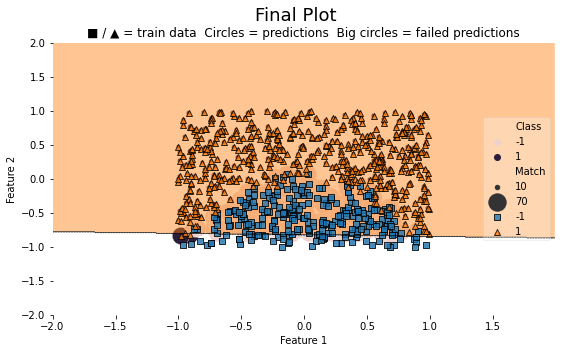

In [65]:
feature_values_np = feature_values[['Feature 1', 'Feature 2']].to_numpy()

def repack_results2(train_size=1, ok_size=10, ko_size=70, svm_labels=[]):
    """
    I'm labels_np = labels.to_numpy()converting back the arrays to a dataframe.
    Also, I am giving a large numerical value where predictions DO NOT match input data
    """
    traindata = pd.DataFrame(train_set, columns=["Feature 1", "Feature 2"])
    traindata["Class"] = train_set["Class"]
    traindata["Match"] = [ok_size if x == y else ko_size for x,y in zip(labels, svm_labels)]
    return traindata.sort_values(by="Class", ascending=False)

def plot_results(SVMmodel, res_data):
    fig = plt.figure(figsize=(9,5))
    fig.suptitle(suptitle, size=18)
    ax = sns.scatterplot(data=res_data, x="Feature 1", y="Feature 2", hue="Class", size="Match", sizes=(20,300))
    ax.set_title("■ / ▲ = train data  Circles = predictions  Big circles = failed predictions")

    plot_decision_regions(feature_values_np, labels_np, clf=SVMmodel, legend=5)

    
res_train = repack_results2(svm_labels = labels_train_pred_svm1)
print(res_train["Match"].value_counts())
plot_results(svm_clf_1, res_train)

82.5%
86.48%
10    691
70    108
Name: Match, dtype: int64


C:\Users\catat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


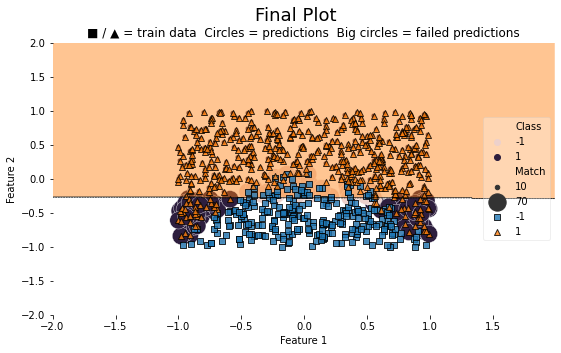

In [66]:
labels_pred_svm2 = svm_clf_2.predict(feature_values_test)
labels_train_pred_svm2 = svm_clf_2.predict(feature_values)
acc = accuracy_score(labels_test, labels_pred_svm2)
print(round(acc*100, 2), "%", sep="")
acc = accuracy_score(labels, labels_train_pred_svm2)
print(round(acc*100, 2), "%", sep="")

res_train = repack_results2(svm_labels = labels_train_pred_svm2)
print(res_train["Match"].value_counts())
plot_results(svm_clf_2, res_train)

81.5%
86.23%
10    689
70    110
Name: Match, dtype: int64


C:\Users\catat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


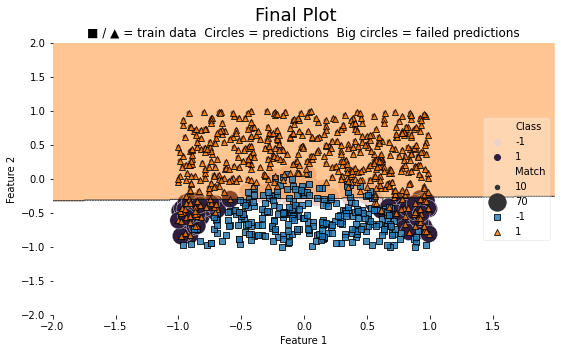

In [67]:
labels_pred_svm3 = svm_clf_3.predict(feature_values_test)
acc = accuracy_score(labels_pred_svm3, labels_test)
print(round(acc*100, 2), "%", sep="")

labels_train_pred_svm3 = svm_clf_3.predict(feature_values)
acc = accuracy_score(labels, labels_train_pred_svm3)
print(round(acc*100, 2), "%", sep="")

res_train = repack_results2(svm_labels = labels_train_pred_svm3)
print(res_train["Match"].value_counts())
plot_results(svm_clf_3, res_train)

In [52]:
labels_pred_svm4 = svm_clf_4.predict(feature_values_test)
acc = accuracy_score(labels_pred_svm4, labels_test)
print(round(acc*100, 2), "%", sep="")

labels_train_pred_svm4 = svm_clf_4.predict(feature_values)
acc = accuracy_score(labels, labels_train_pred_svm4)
print(round(acc*100, 2), "%", sep="")
#plot_results(svm_clf_4)

81.5%
86.23%


In [53]:
labels_pred_svm5 = svm_clf_5.predict(feature_values_test)
acc = accuracy_score(labels_pred_svm5, labels_test)
print(round(acc*100, 2), "%", sep="")

labels_train_pred_svm5 = svm_clf_5.predict(feature_values)
acc = accuracy_score(labels, labels_train_pred_svm5)
print(round(acc*100, 2), "%", sep="")
#plot_results(svm_clf_5)

82.5%
86.48%


82.5%


C:\Users\catat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


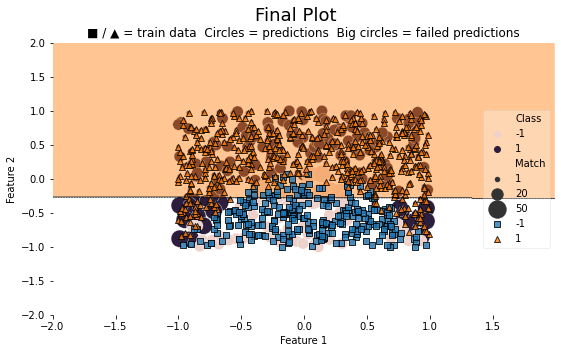

In [38]:
labels_pred_svm6 = svm_clf_6.predict(feature_values_test)
acc = accuracy_score(labels_pred_svm6, labels_test)
print(round(acc*100, 2), "%", sep="")
plot_results(svm_clf_6)

## (iii) Comment on the fact that, tunning the C parameter does not affect the performance overall for the linearSVC

## (iv) Compare what I had to Logistic regression

# (c) Train logistic classifier with some extra features

In [19]:
print(train_set.head())
print(test_set.head())

     Feature 1  Feature 2  Class
778       0.46      -0.46     -1
286       0.71      -0.98     -1
165       0.17       0.78      1
960      -0.21       0.57      1
493      -0.17      -0.49     -1
     Feature 1  Feature 2  Class
453      -0.90      -0.89      1
793       0.89      -0.82     -1
209      -0.73      -0.90     -1
309      -0.66       0.19      1
740      -0.11      -0.45     -1


## (i) Create additional features by adding the square of each feature 

In [68]:
train_set['Feature 3'] = train_set['Feature 1'].pow(2)
train_set['Feature 4'] = train_set['Feature 2'].pow(2)
train_set.head()

,Feature 1,Feature 2,Class,Feature 3,Feature 4
778,0.46,-0.46,-1,0.2116,0.2116
286,0.71,-0.98,-1,0.5041,0.9604
165,0.17,0.78,1,0.0289,0.6084
960,-0.21,0.57,1,0.0441,0.3249
493,-0.17,-0.49,-1,0.0289,0.2401


In [69]:
test_set['Feature 3'] = test_set['Feature 1'].pow(2)
test_set['Feature 4'] = test_set['Feature 2'].pow(2)
test_set.head()

,Feature 1,Feature 2,Class,Feature 3,Feature 4
453,-0.90,-0.89,1,0.8100,0.7921
793,0.89,-0.82,-1,0.7921,0.6724
209,-0.73,-0.90,-1,0.5329,0.8100
309,-0.66,0.19,1,0.4356,0.0361
740,-0.11,-0.45,-1,0.0121,0.2025


In [70]:
# train the logistic regression classifier
feature_values = train_set.drop("Class", axis=1)
labels = train_set["Class"].copy()
log_reg = LogisticRegression()
log_reg.fit(feature_values, labels)

LogisticRegression()

In [71]:
print(log_reg.coef_)

[[ 1.00377304e-03  6.47882246e+00  6.21302699e+00 -8.45706910e-01]]


In [74]:
feature_values_test = test_set.drop("Class", axis=1)
labels_test = test_set["Class"].copy()
labels_pred = log_reg.predict(feature_values_test)
acc = accuracy_score(labels_pred, labels_test)
print(round(acc*100, 2), "%", sep="")

labels_pred_train = log_reg.predict(feature_values)
acc = accuracy_score(labels, labels_pred_train)
print(round(acc*100, 2), "%", sep="")

95.5%
96.62%


In [ ]:
#problema e ca avem foarte multe valori de 1 pe coloana match

## Prediction plot over the new dataset

In [78]:
feature_values_np = feature_values[['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4']].to_numpy()
labels_np = labels.to_numpy()
print(feature_values)

     Feature 1  Feature 2  Feature 3  Feature 4
778       0.46      -0.46     0.2116     0.2116
286       0.71      -0.98     0.5041     0.9604
165       0.17       0.78     0.0289     0.6084
960      -0.21       0.57     0.0441     0.3249
493      -0.17      -0.49     0.0289     0.2401
..         ...        ...        ...        ...
106      -0.40      -0.23     0.1600     0.0529
270       0.85       0.65     0.7225     0.4225
860       0.64       0.97     0.4096     0.9409
435       0.22      -0.68     0.0484     0.4624
102      -0.30      -0.47     0.0900     0.2209

[799 rows x 4 columns]


In [75]:

def repack_results(train_size=1, ok_size=20, ko_size=50):
    """
    I'm converting back the arrays to a dataframe.
    Also, I am giving a large numerical value where predictions DO NOT match input data
    """
    traindata = feature_values
    traindata["Class"] = labels
    traindata["Match"] = [train_size for _ in range(traindata.shape[0])]
    
    results = feature_values_test
    results["Class"] = labels_test
    results["Match"] = [ok_size if x == y else ko_size for x,y in zip(labels_test, labels_pred)]
    return pd.concat([results, traindata]).sort_values(by="Class", ascending=False)

def repack_results2(train_size=1, ok_size=10, ko_size=70):
    """
    I'm labels_np = labels.to_numpy()converting back the arrays to a dataframe.
    Also, I am giving a large numerical value where predictions DO NOT match input data
    """
    traindata = pd.DataFrame(train_set, columns=["Feature 1", "Feature 2"])
    traindata["Class"] = train_set["Class"]
    traindata["Match"] = [ok_size if x == y else ko_size for x,y in zip(labels, labels_pred_train)]
    return traindata.sort_values(by="Class", ascending=False)

res = repack_results2()
print(res["Match"].value_counts())

10    772
70     27
Name: Match, dtype: int64


C:\Users\catat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


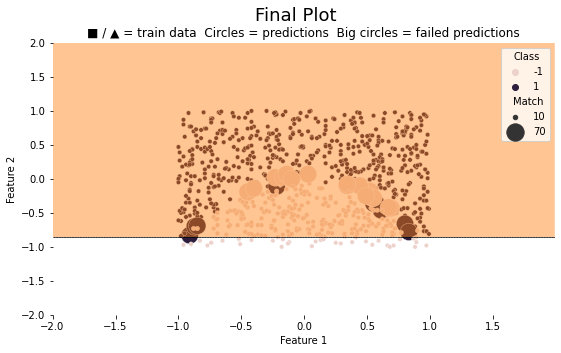

In [82]:

feature_values_ignored = {i:1 for i in range(2, 4)}  


def plot_results(model, data):
    fig = plt.figure(figsize=(9,5))
    fig.suptitle(suptitle, size=18)
    ax = sns.scatterplot(data=res, x="Feature 1", y="Feature 2", hue="Class", size="Match", sizes=(20,300))
    ax.set_title("■ / ▲ = train data  Circles = predictions  Big circles = failed predictions")

    plot_decision_regions(feature_values_np, labels_np, clf=model,
                         filler_feature_values=feature_values_ignored,
                         legend=5)
    

plot_results(log_reg, res)

In [114]:
print(labels_test.value_counts())
print(labels.value_counts())
# 1 is definately the most common class

 1    120
-1     80
Name: Class, dtype: int64
 1    525
-1    274
Name: Class, dtype: int64


In [26]:
_ = np.ones(labels_pred.shape)
acc = accuracy_score(_, labels_test)
print(round(acc*100, 2), "%", sep="")

60.0%
